# 乳腺癌分析大作业

## written by 张邶钏2022217346

## 1.简要分析

### 1.目的

基于scikit-learn、TensorFlow或PyTorch软件包，对Kaggle平台上的威斯康辛州乳腺癌数据集进行分类，并可视化。尝试多种不同的分类方法，并最终比较分类结果。

### 2.分析

1.这是一个典型的监督学习任务，诊断结果即为标签。
2.这是一个二分类学习任务，需要通过给出的特征来判断诊断结果是良性还是恶性。
3.数据量并不是很大。

## 2.数据获取

### 2.1定义获取数据的函数

In [3]:
import os
import zipfile
import requests
import pandas as pd
data_url = 'https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip'
data_path = os.path.join('D:\dataset', 'data')
def get_data(data_url):
    os.makedirs(data_path, exist_ok=True)
    zip_path = os.path.join(data_path, "data.zip")
    response = requests.get('https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip')
    with open(zip_path, 'wb') as f:
        f.write(response.content)
    #解压
    zip_file = zipfile.ZipFile(zip_path)
    zip_file.extract('wdbc.data',data_path + '\datas')
    zip_file.close()

    #将文件修改为csv文件
    data = pd.read_table(data_path + '\datas' + '\wdbc.data', sep=',')
    data.to_csv(data_path + '\datas\wdbc.csv', header = False, index=False)

·调用get_data()，在D盘自动创建datasets/data 目录，然后下载data.zip文件，解压该文件，获取wdbc.data文件，然后转换为wdbc.csv文件。

In [4]:
get_data(data_url)

In [5]:
path = data_path + '\datas\wdbc.csv'
def load_data(path):
    return pd.read_csv(path, header=None)

data = load_data(path)
header = ['id','诊断','adius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', '凹points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', '凹points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', '凹points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data.columns = header
DATA = data

### 2.2查看数据结构

·查看前五行数据

In [6]:
data.head()

,id,诊断,adius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,凹points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,凹points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


·通过info（）方法可以快速获取数据集的简单描述。如总行数，每个属性的类型和非空值的数量。

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    int64  
 1   诊断                       568 non-null    object 
 2   adius_mean               568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   凹points_mean             568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

由分析可知，csv文件中总共有30种特征，诊断结果为标签，则该分类为有监督分类，即分类为良性和恶性。特征值均为数值，标签为字符类型，需要进行转换，每种特征都有568个数值，无缺失值，故不需要进行缺失值处理。

·显示属性摘要

In [8]:
data.describe()

,id,adius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,凹points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,凹points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3数据处理

### 3.1数据清洗

In [9]:
data.drop(columns='id', inplace=True)

·在诊断列中，M表示肿瘤恶性，B表示肿瘤良性。将M用1代替，B用0代替。

In [10]:
data['诊断'] = data['诊断'].map({'M':1,'B':0})

### 3.2绘制每个数值属性的直方图

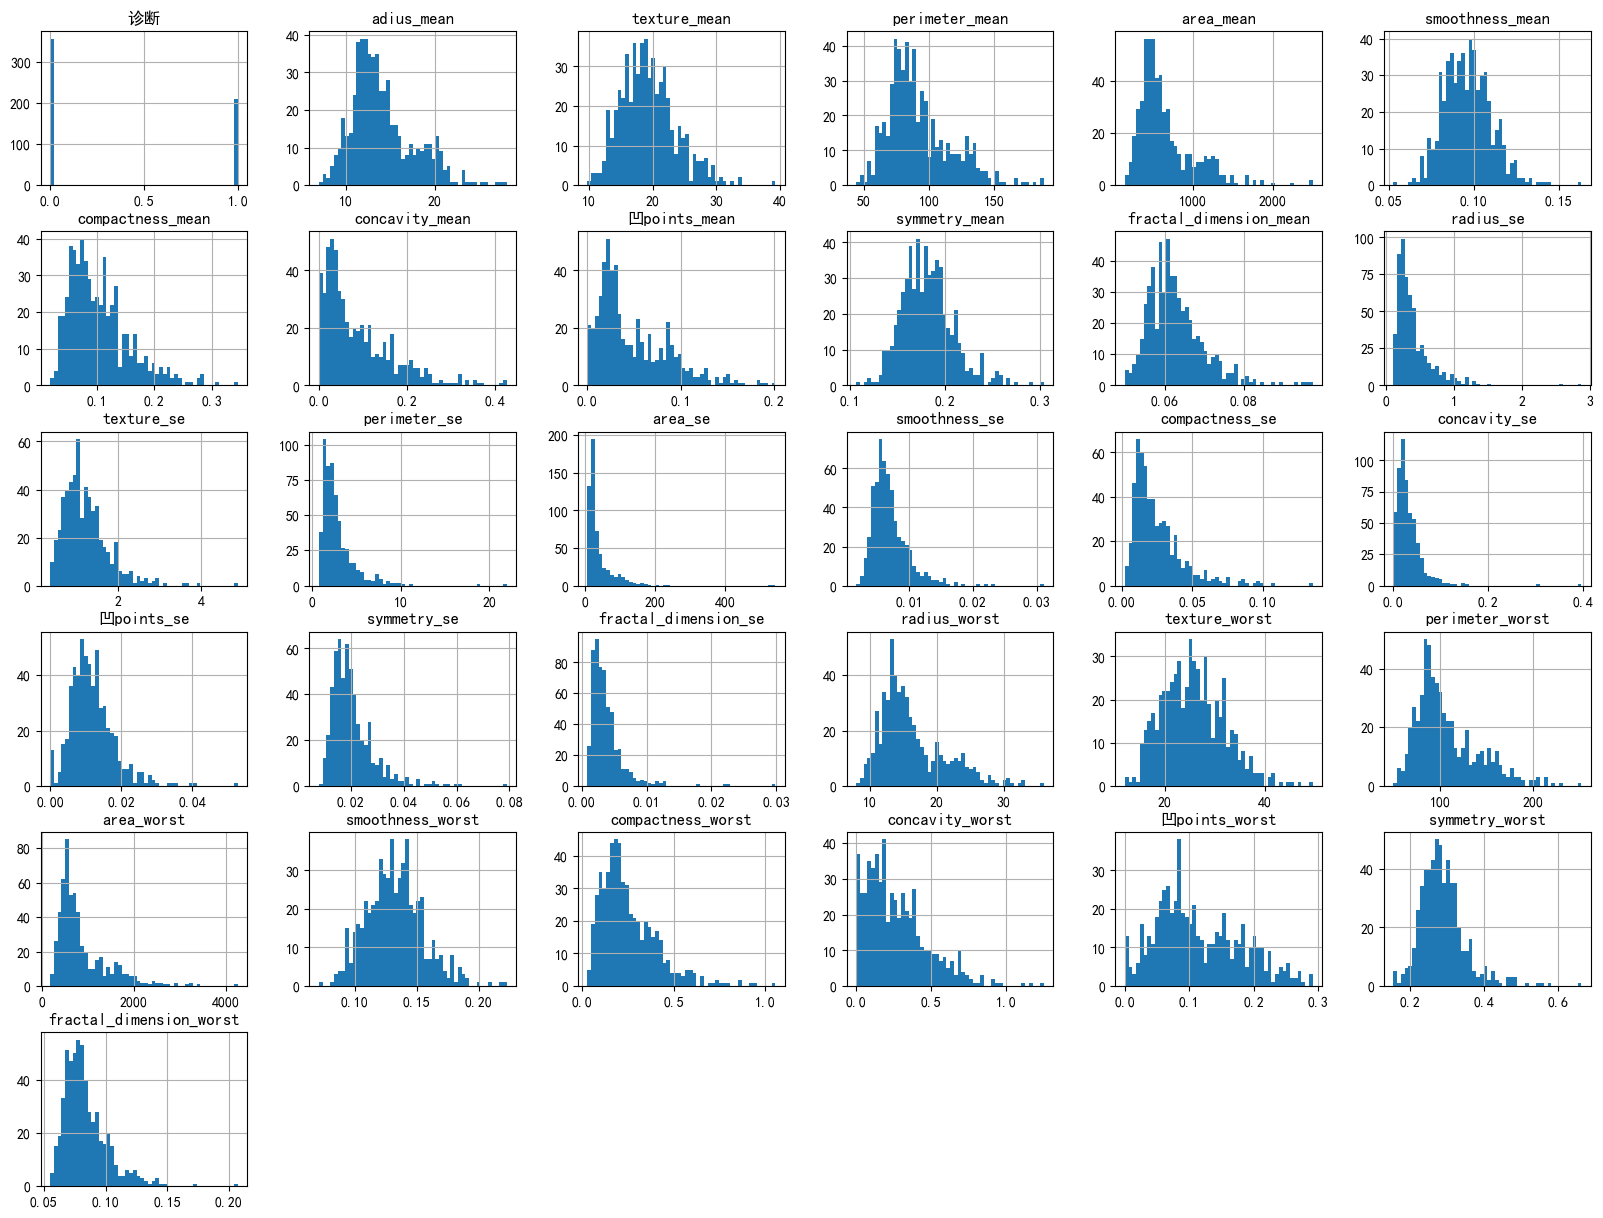

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
data.hist(bins=50, figsize=(20,15))
plt.title('数值特征直方图-张邶钏')
plt.show()

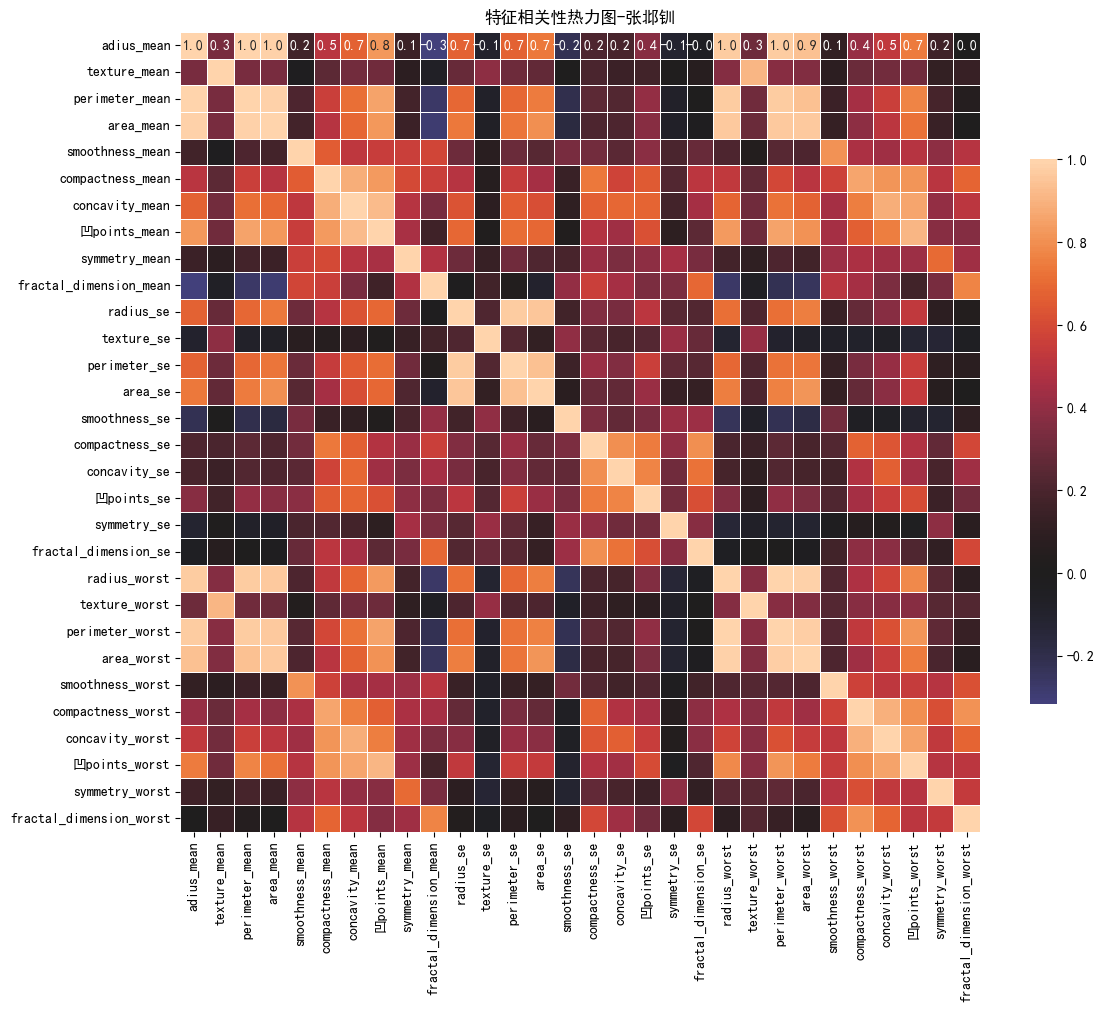

In [12]:
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 12))
sns.heatmap(data.drop(columns='诊断').corr(), center=0, square=True, linewidths=0.5, cbar_kws={'shrink':.5}, annot=True, fmt='.1f')
plt.title('特征相关性热力图-张邶钏')
plt.tight_layout()

由相关性热力图可知，特征值area_worst、perimeter_worst、radius_worst相关，perimeter_mean、area_mean、radius_worst相关，故可以以area_worst特征值为代表。

In [13]:
data.drop(columns=['perimeter_worst', 'radius_worst', 'perimeter_mean'], inplace=True)

### 3.3特征放缩

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Array = np.array(data.iloc[:, :])
scaler = MinMaxScaler()
Data = pd.DataFrame(scaler.fit_transform(Array))

### 3.4创建数据集

将数据集划分为特征和标签，其中诊断结果为标签。

In [15]:
from sklearn.model_selection import train_test_split
x = data.drop(columns='诊断')
y = data['诊断']
x_train, x_test, y_train, y_test  = train_test_split(x, y,  test_size=0.2, random_state=5)

## 4.选择和训练模型

### 4.1决策树分类

#### 建立模型

In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state= 30, splitter='random')
clf = clf.fit(x_train, y_train)
#预测的准确度
score = clf.score(x_test,y_test)
print(score)

0.9210526315789473


#### 调参

In [17]:
from sklearn.model_selection import GridSearchCV

par = {'criterion':['gini', 'entropy'], 'max_depth':[int(x) for x in list(np.linspace(1,10,10))], 'min_samples_leaf':[2,3,4,5,10], 'min_impurity_decrease':[0.1,0.2,0.5]}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=par, cv=10)
grid.fit(x_train, y_train)
grid.best_score_

0.9165217391304348

##### 限制树的最大深度

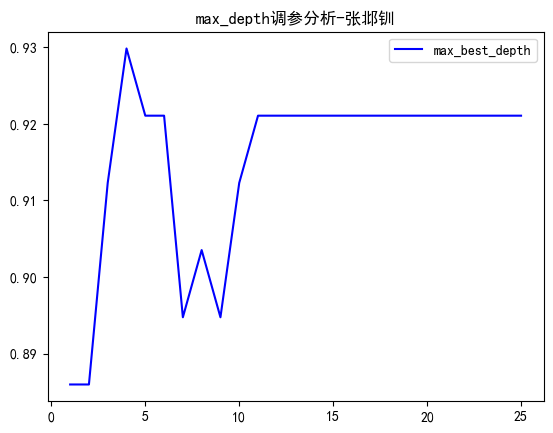

4


In [18]:
test = []
for i in range(25):
    clf = tree.DecisionTreeClassifier(max_depth=i + 1, criterion='entropy', random_state=30, splitter='random')
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)

plt.plot(range(1,26), test, color='blue', label='max_best_depth')
plt.legend()
plt.title('max_depth调参分析-张邶钏')
plt.show()
best_depth = test.index(max(test)) + 1 # best_depth = 4
print(best_depth)

由图可知，在树的深度超过10以后，最优分数基本稳定，变化幅度很小，在depth=4时，分数最高，故树的最优深度为4。

In [19]:
clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=30, splitter='random')
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(score)

0.9298245614035088


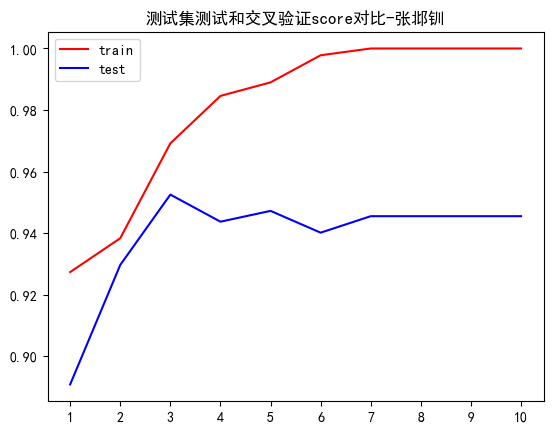

In [20]:
from sklearn.model_selection import cross_val_score
train = []
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i + 1, criterion='entropy', random_state=25)
    clf = clf.fit(x_train, y_train)
    socre_train = clf.score(x_train, y_train)
    score_test = cross_val_score(clf, x, y, cv=10).mean()
    train.append(socre_train)
    test.append(score_test)
plt.plot(range(1, 11), train, color='red', label='train')
plt.plot(range(1, 11), test, color='blue', label='test')
plt.xticks(range(1, 11))
plt.title('测试集测试和交叉验证score对比-张邶钏')
plt.legend()
plt.show()

##### 一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生。

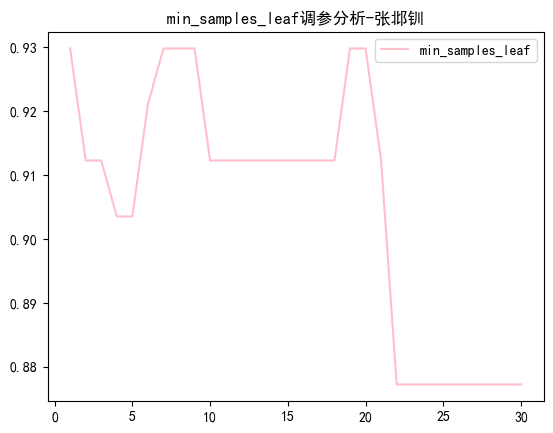

1


In [21]:
test = []
for i in range(30):
    clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=30, splitter='random', min_samples_leaf=i + 1)
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,31), test, color='pink', label = 'min_samples_leaf')
plt.title('min_samples_leaf调参分析-张邶钏')
plt.legend()
plt.show()
print(test.index(max(test)) + 1)

由图可知，当min_samples_leaf=1时，效果最好。

In [22]:
clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=30, splitter='random', min_samples_leaf=1)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(score)

0.9298245614035088


一个节点必须要包含至少min_samples_split个训练样本，这个样点才允许被分枝，否则分枝不会发生。

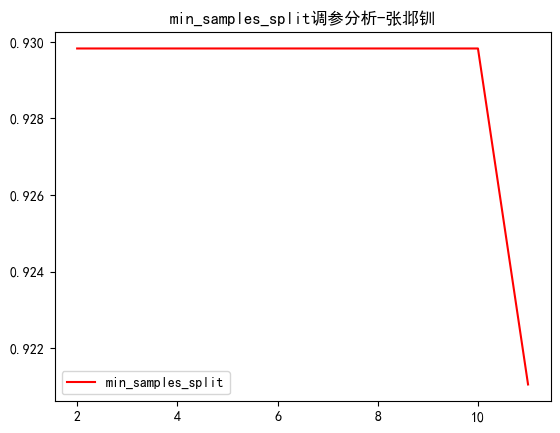

In [23]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=30, splitter='random', min_samples_leaf=1, min_samples_split=i + 2)
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(2,12), test, color='red', label = 'min_samples_split')
plt.title('min_samples_split调参分析-张邶钏')
plt.legend()
plt.show()

In [24]:
clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=30, splitter='random', min_samples_leaf=1, min_samples_split=2)
clf = clf.fit(x_train, y_train)
score1 = clf.score(x_test, y_test)
print(score1)

0.9298245614035088


In [25]:
y_predict = clf.predict(x_test)
print(y_predict)

[1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0
 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 1 1]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        71
           1       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



### 4.2 SVM分类器

In [27]:
from sklearn import svm
from sklearn import metrics
sv = svm.SVC()
sv.fit(x_train, y_train)
prediction = sv.predict(x_test)
score2 = metrics.accuracy_score(prediction, y_test)
print(score2)

0.8859649122807017


In [28]:
sv2 = svm.LinearSVC(dual=False)
sv2.fit(x_train, y_train)
prediction = sv2.predict(x_test)
score3 = metrics.accuracy_score(prediction, y_test)
print(score3)

0.956140350877193


### 4.3 逻辑回归分类

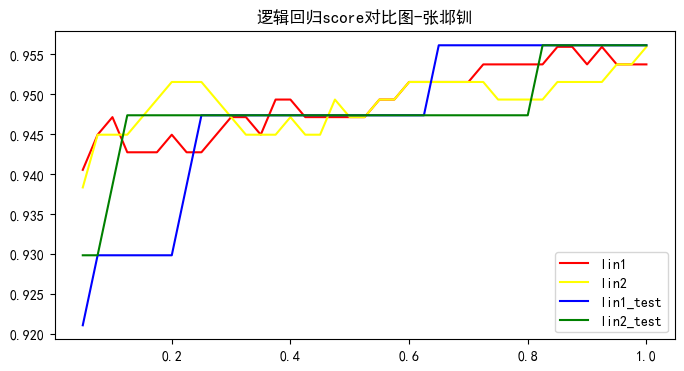

0.956140350877193
0.956140350877193


In [31]:
from sklearn.linear_model import LogisticRegression

l1, l2, l1_test, l2_test = [], [], [], []
for i in np.linspace(0.05, 1, 39):
    lin1 = LogisticRegression(penalty='l1', solver='liblinear', C=i, max_iter=1000)
    lin2 = LogisticRegression(penalty='l2', solver='liblinear', C=i, max_iter=1000)

    lin1.fit(x_train, y_train)
    lin2.fit(x_train, y_train)

    l1.append(metrics.accuracy_score(lin1.predict(x_train), y_train))
    l1_test.append(metrics.accuracy_score(lin1.predict(x_test), y_test))

    l2.append(metrics.accuracy_score(lin2.predict(x_train), y_train))
    l2_test.append(metrics.accuracy_score(lin2.predict(x_test), y_test))

plt.figure(figsize=(8,4))
label = ['lin1', 'lin2', 'lin1_test', 'lin2_test']
color = ['red', 'yellow', 'blue', 'green']
result = [l1, l2, l1_test, l2_test]
for i in range(4):
    plt.plot(np.linspace(0.05, 1, 39), result[i], color[i], label=label[i])
plt.title('逻辑回归score对比图-张邶钏')
plt.legend()
plt.show()
score4 = max(l1_test)
score5 = max(l1_test)
print(score4)
print(score5)

## 5 分类方法比较

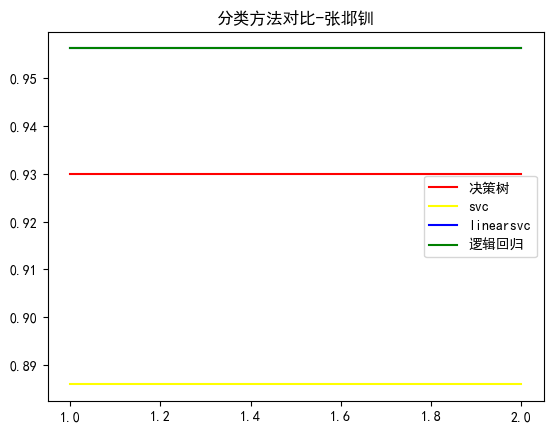

In [30]:
scores = [score1, score2, score3, score4]
label = ['决策树', 'svc', 'linearsvc', '逻辑回归']
for i in range(4):
    plt.plot([1,2], [scores[i], scores[i]], color = color[i], label=label[i])
plt.title('分类方法对比-张邶钏')
plt.legend()
plt.show()

通过分析可知，对于威斯康辛州乳腺癌数据集，在三种分类方法中，支持向量机中的svc对于数据集的分类效果最差，决策树分类的效果的score在0.93左右，支持向量机中的线性支持向量分类器效果和逻辑回归分类效果最好。

## 6 总结

### 1.逻辑回归

逻辑回归主要解决二分类问题，采用梯度下降方法优化损失，采用sigmod()函数将结果映射为[0`1]，其中的正则化主要是避免过拟合。正则化可以避免过拟合的原因就是它降低了特特征的权重，使得模型更简单。主要思想是保留所有特征变量，惩罚所有变量，让每个特征值变量对结果的影响变小，这样拟合出来的模型才会更简单，从而减少过拟合的可能性。其中包含L1正则化和L2正则化。L1正则化有特征筛选的作用，对所有参数的惩罚力度都一样，可以让一部分权重变为0，因此产生稀疏模型，能够除去某些特征。L2正则化可以使各个维度权重普遍变小，减少了权重的固定比例。由4.3结果数据图可知，L1正则化将特征值系数降低为0，而L2不会。

### 2.SVM支持向量机

支持向量机是一种二分类模型，其基本模型定义为特征空间上的间隔最大的线性分类器，其学习策略便是间隔最大化，最终可转化成一个凸二次规划问题的求解。核心思想是寻找一个超平面，使得两个类别之间的间隔最大化，从而实现良好的分类效果。SVM可以处理线性可分和线性不可分的问题，通过引入核函数将数据映射到高维空间实现非线性分类。SVM适用于小样本数据集，避免局部最优解，同时通过使用支持向量定义决策边界，这这使得它对于噪声数据具有一定的鲁棒性。

### 3.决策树

决策树是一个预测模型，它代表的是对象属性与对象值之间的一种映射关系。树中每个节点表示某个对象，而每个分叉路径则代表某个可能的属性值，而每个叶节点则对应从根节点到该叶节点所经历的路径所表示的对象的值。一个决策树包含三种类型的节点：
决策，示
机，表示
。决策树是一树状结构，它的每一个叶节点对应着一个分类，非叶节点对应着在某个属性上的划分，根据样本在该属性上的不同取值将其划分成若干个子集。对于非纯的叶节点，多数类的标号给出到达这个节点的样本所属的类。构造决策树的核心问题是在每一步如何选择适当的属性对样本做拆分。对一个分类问题，从已知类标记的训练样本中学习并构造出决策树是一个自上而下，分而治之的过程。决策树有着简单的理解和解释，树木可以可来表示

## written by 周瑞鑫2022217351

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('C:\\Users\\zhanghanhan\\Desktop\\data.csv',encoding='gbk')
mapping = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(mapping)

#保存修改后的CSV文件
df.to_csv('data1.csv', index=False)
dataset = pd.read_csv('./data1.csv',sep=',')
dataset.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [87]:
type(dataset)

pandas.core.frame.DataFrame

In [88]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## 展示数据

In [89]:
dataset['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: >

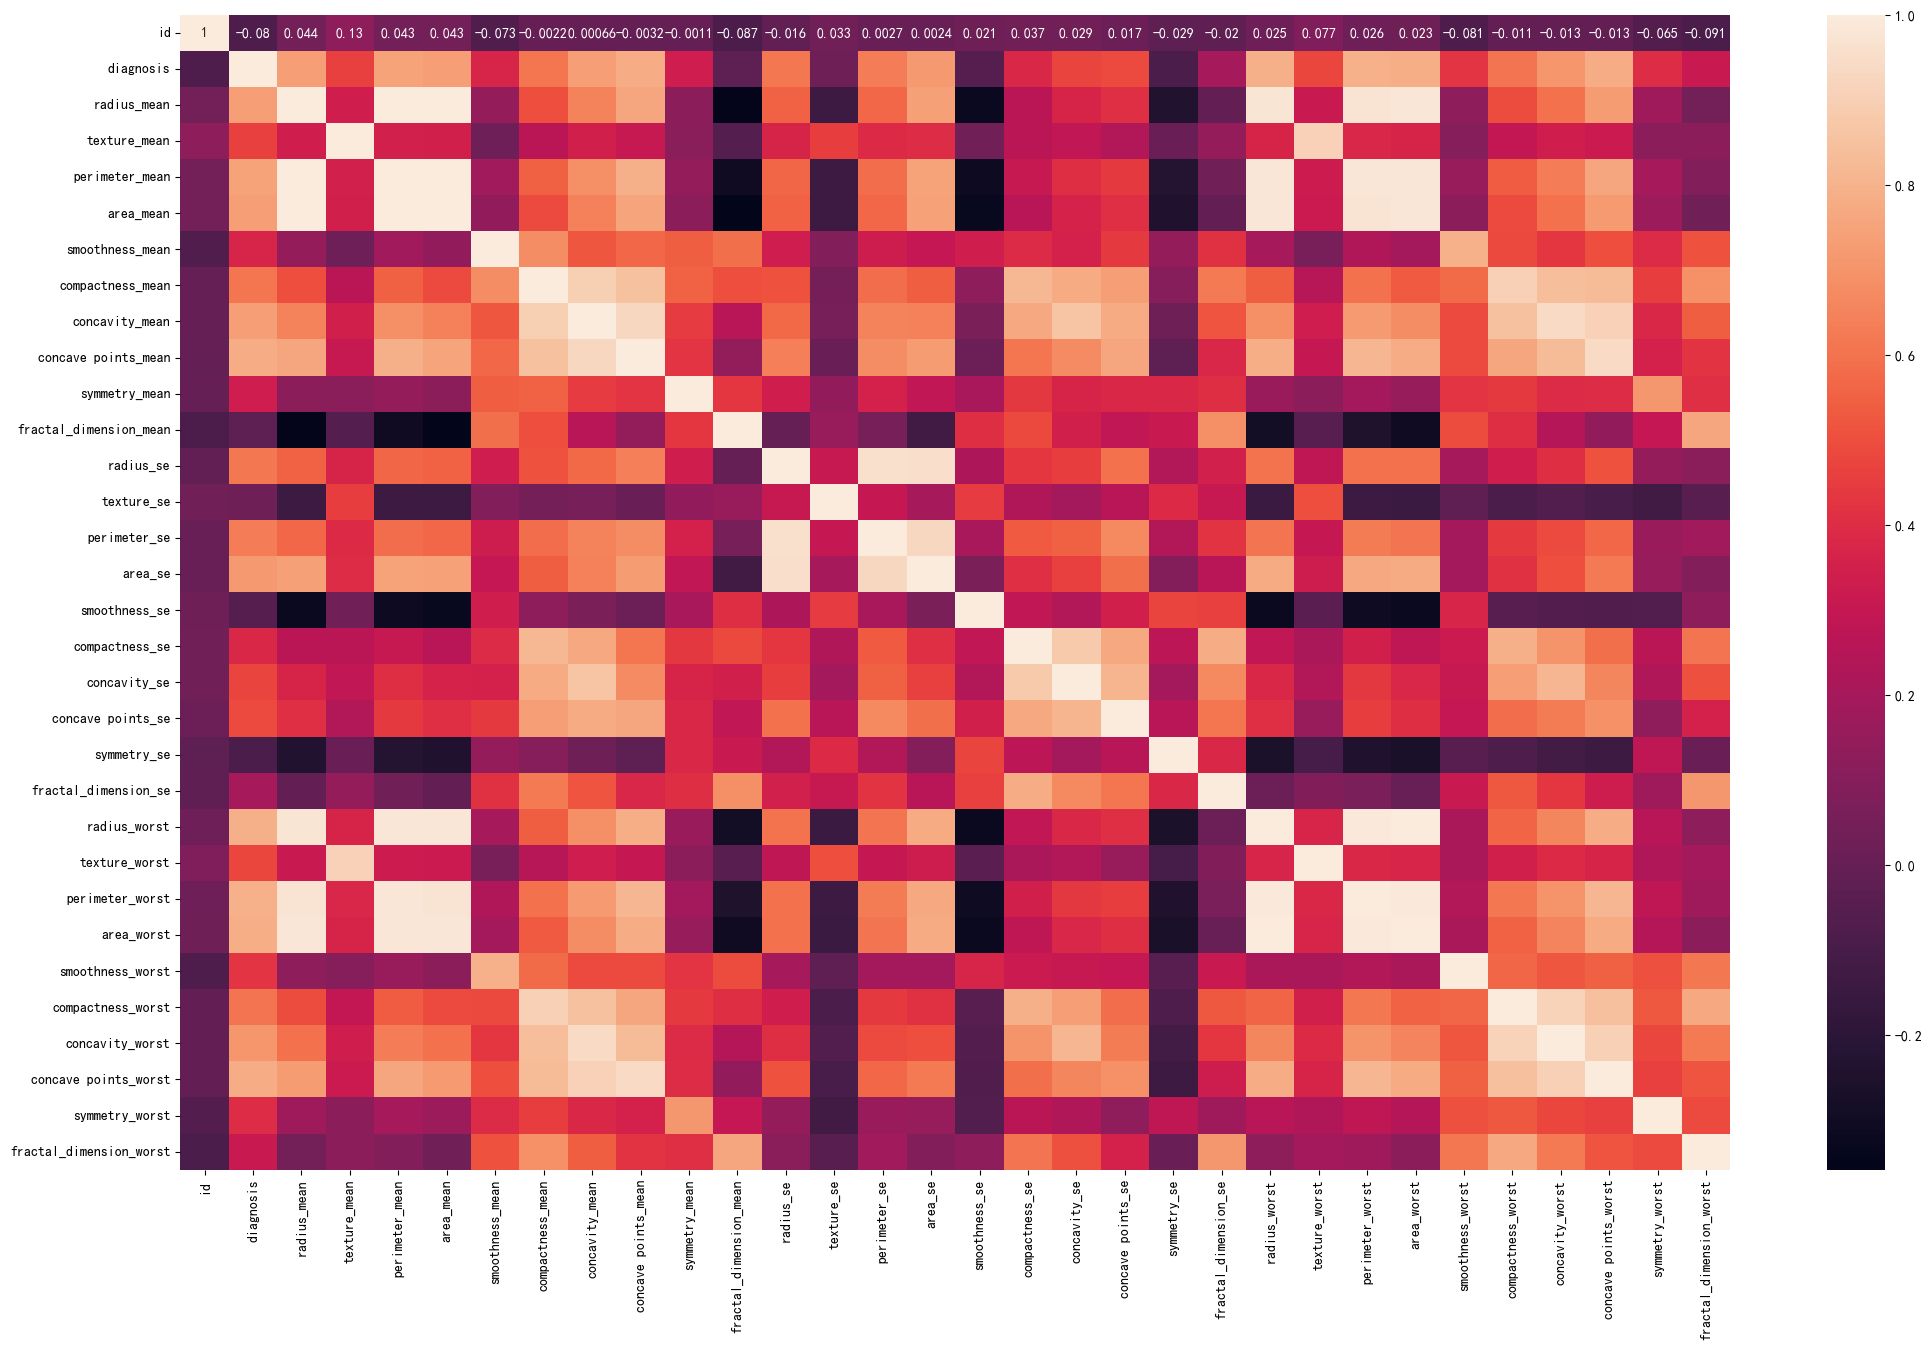

In [90]:
import seaborn as sns
#计算特征相关性并可视化
corr_matrix = dataset.corr(method='spearman')
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True)

## 划分参数x,y，去除无用项id

In [91]:
from sklearn.model_selection import train_test_split
from collections import Counter
x_cols = [col for col in dataset.columns if (col != 'diagnosis')and(col != 'id')]
y_col = 'diagnosis'
X=dataset[x_cols].values
y=dataset[y_col].values

## 划分训练集与测试集

In [92]:
from collections import Counter
from sklearn.model_selection import train_test_split
#选择数据进行训练
X_train, X_test, y_train, y_test = train_test_split(
                    dataset[x_cols],
                    dataset[y_col],
                    test_size=0.1,                #分割比例
                    random_state=51,              #随机数种子
                    shuffle=True,                 #是否打乱顺序 
                   stratify=dataset[y_col]                #指定以Target的比例做分层抽样
)               
print('Distribution of y_train {}'.format(Counter(y_train)))
print('Distribution of y_test {}'.format(Counter(y_test)))

Distribution of y_train Counter({0: 321, 1: 191})
Distribution of y_test Counter({0: 36, 1: 21})


## 使用逻辑回归模型，使用交叉验证评估模型

In [93]:
#导入逻辑回归和交叉验证的库
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#导入评价指标的库
from sklearn.metrics import f1_score

In [ ]:
#声明逻逻辑回归模型，solver使用liblinear，最大迭代次数为500
lr_model = LogisticRegression()
#对原始模型做交叉验证
cv_score = cross_val_score(lr_model, X_train, y_train, scoring='f1', cv=5) 
print('cross validation score of raw model {}'.format(cv_score))
lr_model

## 预设参数

In [100]:
c_range=[0.001,0.01,0.1,1.0]
solvers = ['liblinear','lbfgs','newton-cg','sag']
max_iters=[800,1000,1500,2000,3000]
tuned_parameters= dict(solver=solvers, C=c_range,max_iter=max_iters)

## 网格搜索寻找最佳参数

In [ ]:
#网格搜素
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(lr_model, tuned_parameters, cv=5, scoring='f1')
grid.fit(X_train,y_train)
print('best score for model {}'.format(grid.best_score_))
print('best parameters for model {}'.format(grid.best_params_))
print('best parameters for model {}'.format(grid.best_estimator_))

## 使用预测的最佳参数进行模型训练并评估模型得分

In [ ]:
lr_model_final = LogisticRegression(C=1.0, max_iter=80, solver='newton-cg')
lr_model_final.fit(X_train,y_train)
y_train_pred = lr_model_final.predict(X_train)
print('final score of model: {}'.format(f1_score(y_train,y_train_pred)))

## written by 许汐岩2022217344

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

In [36]:
link ='https://raw.githubusercontent.com/AgustinCdeCelis/Cancer-Logistic-Regression/main/data.csv'
disease_df= pd.read_csv(link)
disease_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Attribute Information:

ID number

ID NUMBER
Diagnosis (M = malignant, B = benign) 3-32)
Ten real-valued features are computed for each cell nucleus:

radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness(local variation in radius lengths)
compactness (perimeter^2 / area - 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symetry
fractal dimension ("coastline approximation" -1)

In [37]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [38]:
disease_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [39]:
disease_df= disease_df.drop(columns=['id','Unnamed: 32'])
disease_df['diagnosis'].unique()
#Las categorias de la variable target

array(['M', 'B'], dtype=object)

In [40]:
#from sklearn.preprocessing import LabelEncoder
#label= LabelEncoder()
#disease_df['diagnosis'] = label.fit_transform(disease_df['diagnosis'])
#disease_df

Maligno = 1
Benigno = 0
Seleccionar Target y Features

In [41]:
target = 'diagnosis'
features = list(disease_df.columns)[1:]
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [42]:
from sklearn.model_selection import train_test_split
train_val_df , test_df = train_test_split(disease_df, test_size =0.1, random_state =42)
train_df , val_df = train_test_split(train_val_df,test_size =0.15,random_state =42)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(435, 31)
(77, 31)
(57, 31)


In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_df[features],train_df[target])

LogisticRegression(solver='liblinear')

In [45]:
print("los coeficientes de cada variable son ",list(model.coef_))
print("el intercept es ",model.intercept_)

los coeficientes de cada variable son  [array([-2.18956709, -0.12671375,  0.01604187,  0.00849694,  0.11522722,
        0.4089921 ,  0.61228548,  0.31302069,  0.15533887,  0.02434335,
        0.01001961, -1.50398367, -0.31616911,  0.12822936,  0.0151919 ,
        0.04793794,  0.08991069,  0.04091572,  0.05074204,  0.00386437,
       -1.40168545,  0.41555217,  0.17666805,  0.02094546,  0.23545854,
        1.16489922,  1.56260252,  0.58609792,  0.65965526,  0.11545075])]
el intercept es  [-0.43815991]


In [46]:
train_preds = model.predict(train_df[features])
train_preds

array(['M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B

In [47]:
train_df[target]

566    M
236    M
482    B
480    B
386    B
      ..
355    B
97     B
159    B
537    B
428    B
Name: diagnosis, Length: 435, dtype: object

In [50]:
train_probs = model.predict_proba(train_df[features])
train_probs

array([[8.81607445e-04, 9.99118393e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.98827796e-01, 1.17220429e-03],
       [9.72720073e-01, 2.72799265e-02],
       [9.96890258e-01, 3.10974171e-03],
       [9.01081423e-02, 9.09891858e-01],
       [8.98984014e-01, 1.01015986e-01],
       [2.93478508e-09, 9.99999997e-01],
       [9.93904497e-01, 6.09550254e-03],
       [7.74768436e-04, 9.99225232e-01],
       [6.37823394e-01, 3.62176606e-01],
       [1.40160772e-10, 1.00000000e+00],
       [9.96421385e-01, 3.57861524e-03],
       [1.10304433e-02, 9.88969557e-01],
       [9.97052487e-01, 2.94751329e-03],
       [9.90454092e-01, 9.54590840e-03],
       [2.20226031e-02, 9.77977397e-01],
       [9.91873250e-13, 1.00000000e+00],
       [9.69136569e-01, 3.08634310e-02],
       [5.50549335e-04, 9.99449451e-01],
       [9.75512455e-01, 2.44875451e-02],
       [9.98937115e-01, 1.06288503e-03],
       [9.95586841e-01, 4.41315876e-03],
       [6.66133815e-16, 1.00000000e+00],
       [1.072129

In [52]:
model.classes_

array(['B', 'M'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(train_df[target],train_preds)

0.9632183908045977

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_df[target],train_preds,normalize='true')

array([[0.98120301, 0.01879699],
       [0.06508876, 0.93491124]])

In [56]:
def predic_plot(input,target, name=''):
    
    pred= model.predict(input)
    accuracy = accuracy_score(target,pred)*100
    print('The Accuracy of the model is', accuracy.round(2))
    cm=confusion_matrix(target,pred,normalize='true')
    matplotlib.rcParams['figure.figsize'] =12,8
    plt.title('{} 混淆矩阵-许汐岩'.format(name))
    
    
    
    sns.heatmap(cm,annot=True)
    return pred

The Accuracy of the model is 96.32


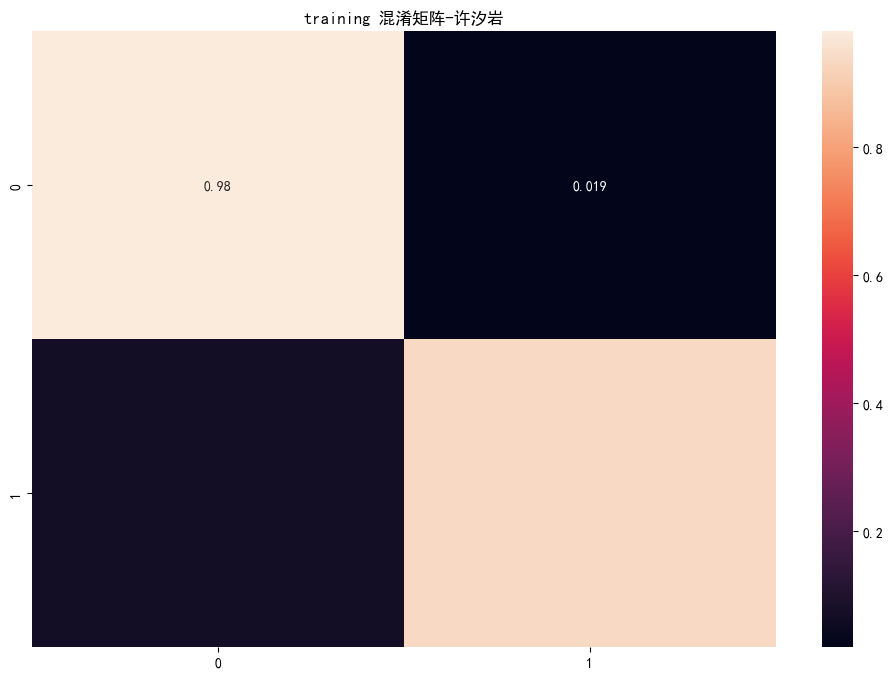

In [57]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
train_preds = predic_plot(train_df[features],train_df[target], 'training')

The Accuracy of the model is 96.32


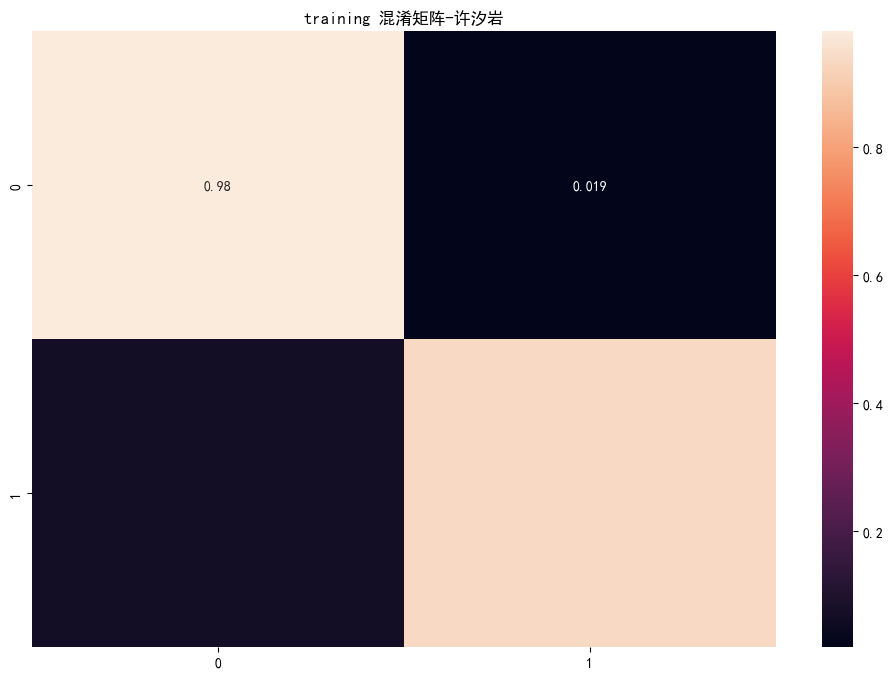

In [58]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
train_preds = predic_plot(train_df[features],train_df[target], 'training')

The Accuracy of the model is 98.25


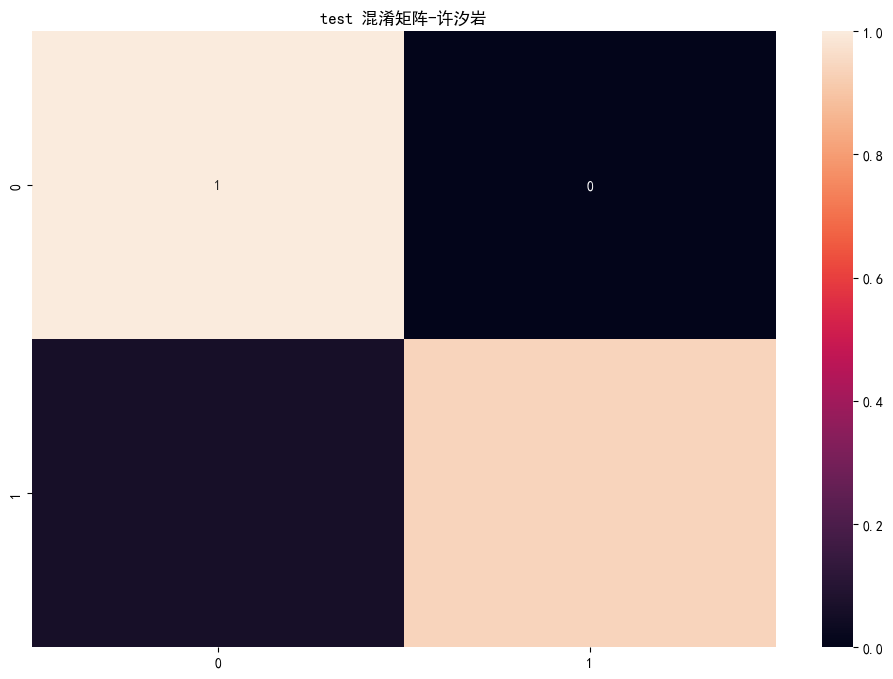

In [59]:
test_preds = predic_plot(test_df[features],test_df[target],'test')

The Accuracy of the model is 98.25


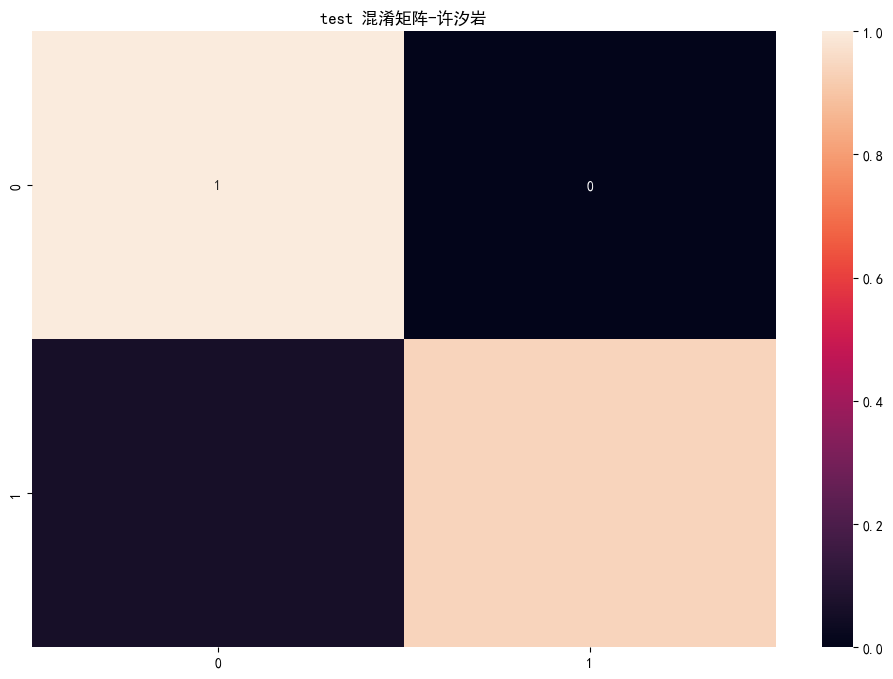

In [60]:
test_preds = predic_plot(test_df[features],test_df[target],'test')

In [61]:
from sklearn.preprocessing import MinMaxScaler
?MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(disease_df[features])

MinMaxScaler()

Init signature: MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
Docstring:     
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean,
unit variance scaling.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
feature_range : tuple (min, max), default=(0, 1)
    Desired range of transformed data.

copy : bool, default=True
    Set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array).

clip : bool, default=False
    Set to True to clip transformed values of held-out data to
    provided `feature range`.

In [62]:
scaler.data_max_

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [63]:
scaler.data_min_

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.602e-01,
       7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [64]:
disease_df[features] = scaler.transform(disease_df[features])
disease_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [65]:
train_val_df, test_df = train_test_split(disease_df,test_size=0.2,random_state = 42)
train_df, val_df = train_test_split(disease_df,test_size=0.25,random_state=42)
train_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,B,0.279663,0.115320,0.263285,0.157964,0.152749,0.054935,0.052952,0.058201,0.139899,...,0.202419,0.093817,0.184222,0.096294,0.165027,0.084806,0.094728,0.184399,0.146659,0.092549
512,M,0.303800,0.365573,0.309930,0.175270,0.523337,0.391142,0.338566,0.406163,0.533333,...,0.301672,0.470149,0.313213,0.162013,0.569438,0.347634,0.407827,0.704811,0.398186,0.366391
402,B,0.282976,0.290159,0.279110,0.161909,0.188499,0.182842,0.095056,0.093588,0.411111,...,0.220562,0.335554,0.228597,0.107329,0.146074,0.198417,0.128115,0.227079,0.323674,0.114325
446,M,0.509679,0.619547,0.507981,0.355504,0.427372,0.343599,0.397844,0.412177,0.329798,...,0.483814,0.706823,0.473081,0.307658,0.455194,0.338514,0.511102,0.676976,0.277351,0.234225
210,M,0.643618,0.420358,0.628222,0.486320,0.345491,0.354027,0.384255,0.475199,0.356061,...,0.544646,0.421642,0.537328,0.361483,0.307931,0.256823,0.308387,0.659794,0.264932,0.023678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,B,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,B,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,...,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,B,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,M,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,...,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


In [66]:
model = LogisticRegression(solver='liblinear')
model.fit(train_df[features],train_df[target])

LogisticRegression(solver='liblinear')

In [67]:
print('los coeficientes del modelo',model.coef_.tolist())
print('el intercept del modelo', model.intercept_)

los coeficientes del modelo [[0.7119638729065494, 0.9207610941705368, 0.7713419551961296, 1.0286851105465677, -0.2629814210052384, 0.3853941155687773, 1.730180720267997, 2.388964412804784, -0.28167392681722453, -1.350315905946093, 1.2095965897295762, -0.37466041930420024, 0.8796275334990061, 0.8474659988620893, -0.37148227651259963, -0.685266302194451, -0.31266015802148744, -0.13135350632489304, -0.5080381318935229, -0.6793734122874394, 1.5467285086612184, 1.5168941885233749, 1.3925271112498663, 1.3999054798286519, 0.6919991393536499, 0.7421475705951108, 1.367804985780938, 2.253888604131348, 0.9919924365051648, 0.1388603455605658]]
el intercept del modelo [-5.3345245]


In [68]:
train_preds = model.predict(train_df[features])
train_preds

array(['B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B

In [69]:
model.predict_proba(train_df[features])

array([[9.57209154e-01, 4.27908464e-02],
       [2.06677679e-01, 7.93322321e-01],
       [9.04305153e-01, 9.56948466e-02],
       [2.52163966e-02, 9.74783603e-01],
       [2.56655127e-02, 9.74334487e-01],
       [4.96360294e-01, 5.03639706e-01],
       [9.49193248e-01, 5.08067517e-02],
       [3.97201449e-01, 6.02798551e-01],
       [9.60571116e-01, 3.94288840e-02],
       [9.87128223e-01, 1.28717774e-02],
       [8.33173278e-01, 1.66826722e-01],
       [9.36576569e-01, 6.34234307e-02],
       [2.29540159e-04, 9.99770460e-01],
       [6.37260435e-02, 9.36273956e-01],
       [9.81018626e-01, 1.89813740e-02],
       [8.37685455e-01, 1.62314545e-01],
       [9.75857254e-01, 2.41427457e-02],
       [9.94111246e-01, 5.88875375e-03],
       [9.37354281e-01, 6.26457190e-02],
       [9.79801067e-01, 2.01989326e-02],
       [8.70276234e-01, 1.29723766e-01],
       [5.80047425e-01, 4.19952575e-01],
       [9.33118817e-01, 6.68811827e-02],
       [9.30133187e-01, 6.98668133e-02],
       [6.512075

In [70]:
accuracy_score(train_preds,train_df[target])

0.9671361502347418

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_df[target],train_preds,normalize='true')

array([[0.99253731, 0.00746269],
       [0.07594937, 0.92405063]])

In [72]:
def predic_plot(feature,target,name=''):
    
    preds=model.predict(feature)
    
    accuracy= accuracy_score(preds,target)
    accuracy = accuracy*100
    print("the acurracy of the model is" , accuracy.round(2))
    
    plt.title('{}混淆矩阵-许汐岩'.format(name))
    sns.heatmap(confusion_matrix(target,preds,normalize='true'),annot=True)

    return preds    

In [73]:
model.classes_

array(['B', 'M'], dtype=object)

the acurracy of the model is 96.71


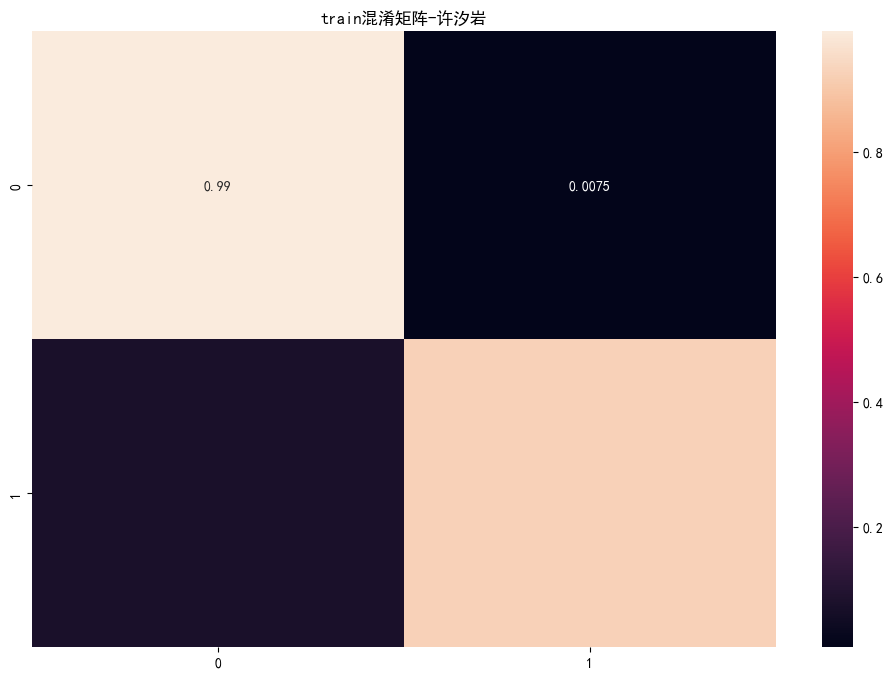

In [74]:
train_preds = predic_plot(train_df[features],train_df[target], "train")

the acurracy of the model is 97.2


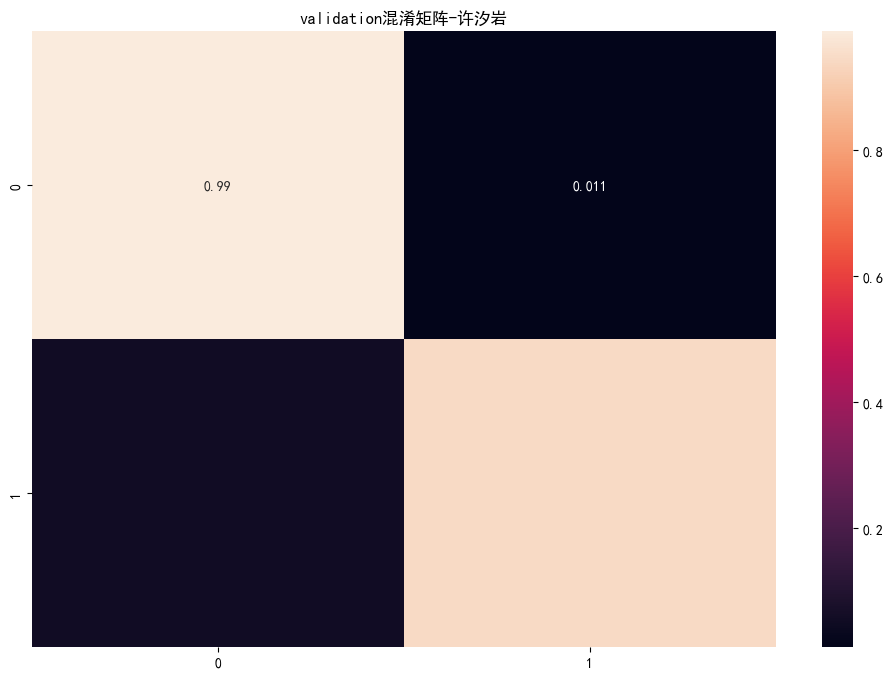

In [75]:
val_preds= predic_plot(val_df[features],val_df[target],'validation')

In [76]:
train_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,B,0.279663,0.115320,0.263285,0.157964,0.152749,0.054935,0.052952,0.058201,0.139899,...,0.202419,0.093817,0.184222,0.096294,0.165027,0.084806,0.094728,0.184399,0.146659,0.092549
512,M,0.303800,0.365573,0.309930,0.175270,0.523337,0.391142,0.338566,0.406163,0.533333,...,0.301672,0.470149,0.313213,0.162013,0.569438,0.347634,0.407827,0.704811,0.398186,0.366391
402,B,0.282976,0.290159,0.279110,0.161909,0.188499,0.182842,0.095056,0.093588,0.411111,...,0.220562,0.335554,0.228597,0.107329,0.146074,0.198417,0.128115,0.227079,0.323674,0.114325
446,M,0.509679,0.619547,0.507981,0.355504,0.427372,0.343599,0.397844,0.412177,0.329798,...,0.483814,0.706823,0.473081,0.307658,0.455194,0.338514,0.511102,0.676976,0.277351,0.234225
210,M,0.643618,0.420358,0.628222,0.486320,0.345491,0.354027,0.384255,0.475199,0.356061,...,0.544646,0.421642,0.537328,0.361483,0.307931,0.256823,0.308387,0.659794,0.264932,0.023678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,B,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,B,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,...,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,B,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,M,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,...,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


In [77]:
val_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
70,M,0.565999,0.392289,0.551517,0.418452,0.338178,0.256181,0.253046,0.395179,0.263636,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194362,0.071166
131,M,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
431,B,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
540,B,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,B,0.362488,0.187014,0.359201,0.215652,0.546809,0.351267,0.233505,0.351093,0.533333,...,0.299182,0.165778,0.293790,0.151986,0.373308,0.273219,0.207987,0.480069,0.312636,0.194740
199,M,0.353495,0.355428,0.350356,0.211750,0.416087,0.310472,0.276476,0.297217,0.449495,...,0.369975,0.482409,0.336122,0.211070,0.554910,0.367038,0.396725,0.631615,0.628425,0.303424
411,B,0.192106,0.240785,0.187478,0.097434,0.497156,0.179928,0.071368,0.123260,0.330303,...,0.159374,0.384328,0.147019,0.070340,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910
18,M,0.607175,0.420697,0.595743,0.473595,0.412386,0.255567,0.346532,0.472068,0.263636,...,0.689790,0.502665,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.237138,0.138463


In [78]:
test_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
70,M,0.565999,0.392289,0.551517,0.418452,0.338178,0.256181,0.253046,0.395179,0.263636,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194362,0.071166
131,M,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
431,B,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
540,B,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,B,0.362488,0.241461,0.348421,0.221633,0.304956,0.146003,0.121649,0.138718,0.176263,...,0.303451,0.357676,0.276856,0.158720,0.284158,0.174356,0.194649,0.269003,0.175439,0.071625
75,M,0.430167,0.336152,0.416765,0.285981,0.352532,0.198945,0.228889,0.329920,0.372727,...,0.421202,0.334222,0.390408,0.255063,0.520571,0.171930,0.225958,0.522337,0.213877,0.057917
249,B,0.214823,0.176530,0.207864,0.111474,0.439379,0.180050,0.101406,0.145577,0.415657,...,0.167912,0.244403,0.151751,0.075354,0.447269,0.127010,0.144089,0.330172,0.216637,0.151187
238,B,0.342610,0.613460,0.336950,0.203775,0.267220,0.259248,0.258435,0.219085,0.142424,...,0.278193,0.760128,0.259425,0.142253,0.243875,0.208895,0.244728,0.282440,0.064065,0.150335


the acurracy of the model is 96.49


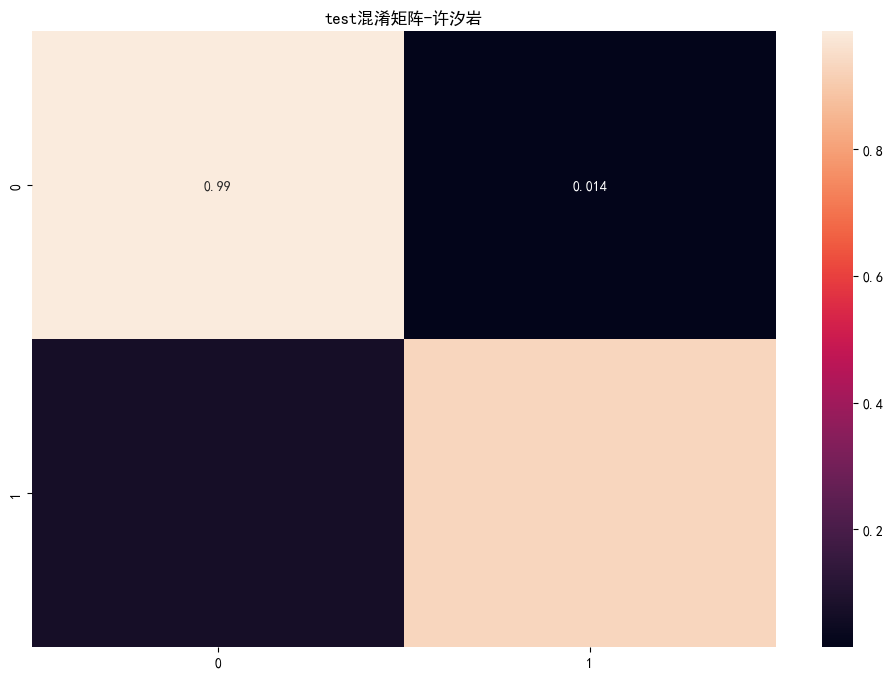

In [79]:
test_pred = predic_plot(test_df[features],test_df[target],'test')

In [80]:
def random_guess(input):
    return np.random.choice(['B','M'],len(input))
def all_b(input):
    return np.full(len(input), "B")
accuracy_score(test_df[target],random_guess(test_df[features]))

0.5

In [81]:
accuracy_score(test_df[target],all_b(test_df[features]))

0.6228070175438597

## written by 杜子航2022217349

导入一些常用模块

In [104]:
import math, copy
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
#from proplot import rc

读取数据集文件

In [105]:
df = pd.read_csv('C:\\Users\\zhanghanhan\\Desktop\\data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


检查数据框中每列的缺失值数量的代码。具体来说，这段代码会返回数据框 df 中每列的缺失值数量之和。
如果返回结果为 0，则表示数据框中没有缺失值；如果返回结果大于 0，则表示数据框中存在缺失值，
并且返回的数字表示每列中缺失值的数量。

In [106]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

在数据框df中删除名为'id'与'Unnamed: 32'的列。axis=1表示沿着列方向（每一列）进行操作。执行这行代码后，df中将不再包含'id'与'Unnamed: 32'这一列。


入scikit-learn库中的MinMaxScaler类。MinMaxScaler是一个用于将数据缩放到0~1的转换器。

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

用 MinMaxScaler 对象（存储在变量 scaler 中）对 df 表格中除了diagnosis列以外的所有列进行拟合和转换。然后，转换后的数据被赋值给 normalized_data。


In [110]:
normalized_data = scaler.fit_transform(df.drop('diagnosis', axis=1))
# array
normalized_data

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [111]:
# convert to dataframe
data = pd.read_csv("C:\\Users\\zhanghanhan\\Desktop\\data.csv")

normlaized_df = pd.DataFrame(normalized_data, columns = df.columns[1:])

In [112]:
normlaized_df['diagnosis'] = df['diagnosis'] 
normlaized_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,M
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,M
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,M
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,M


使用 scikit-learn 库中的 LabelEncoder 对象将 'diagnosis' 列中的分类标签进行编码。LabelEncoder 会将分类标签转换为从 0 开始的整数编码。

In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
normlaized_df['diagnosis'] = label_encoder.fit_transform(normlaized_df['diagnosis'])

In [114]:
normlaized_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,1


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [116]:
X = normlaized_df.drop('diagnosis', axis=1)  
y = normlaized_df['diagnosis']

设置一个准确度的列表，将test_size从0~1按步长0.1划分，寻找最合适的test_size值

In [117]:

accuracy=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, stratify= y, random_state=44)
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy.append(accuracy_score(y_test, predictions))


将测试集占数据比例与准确度的关系可视化

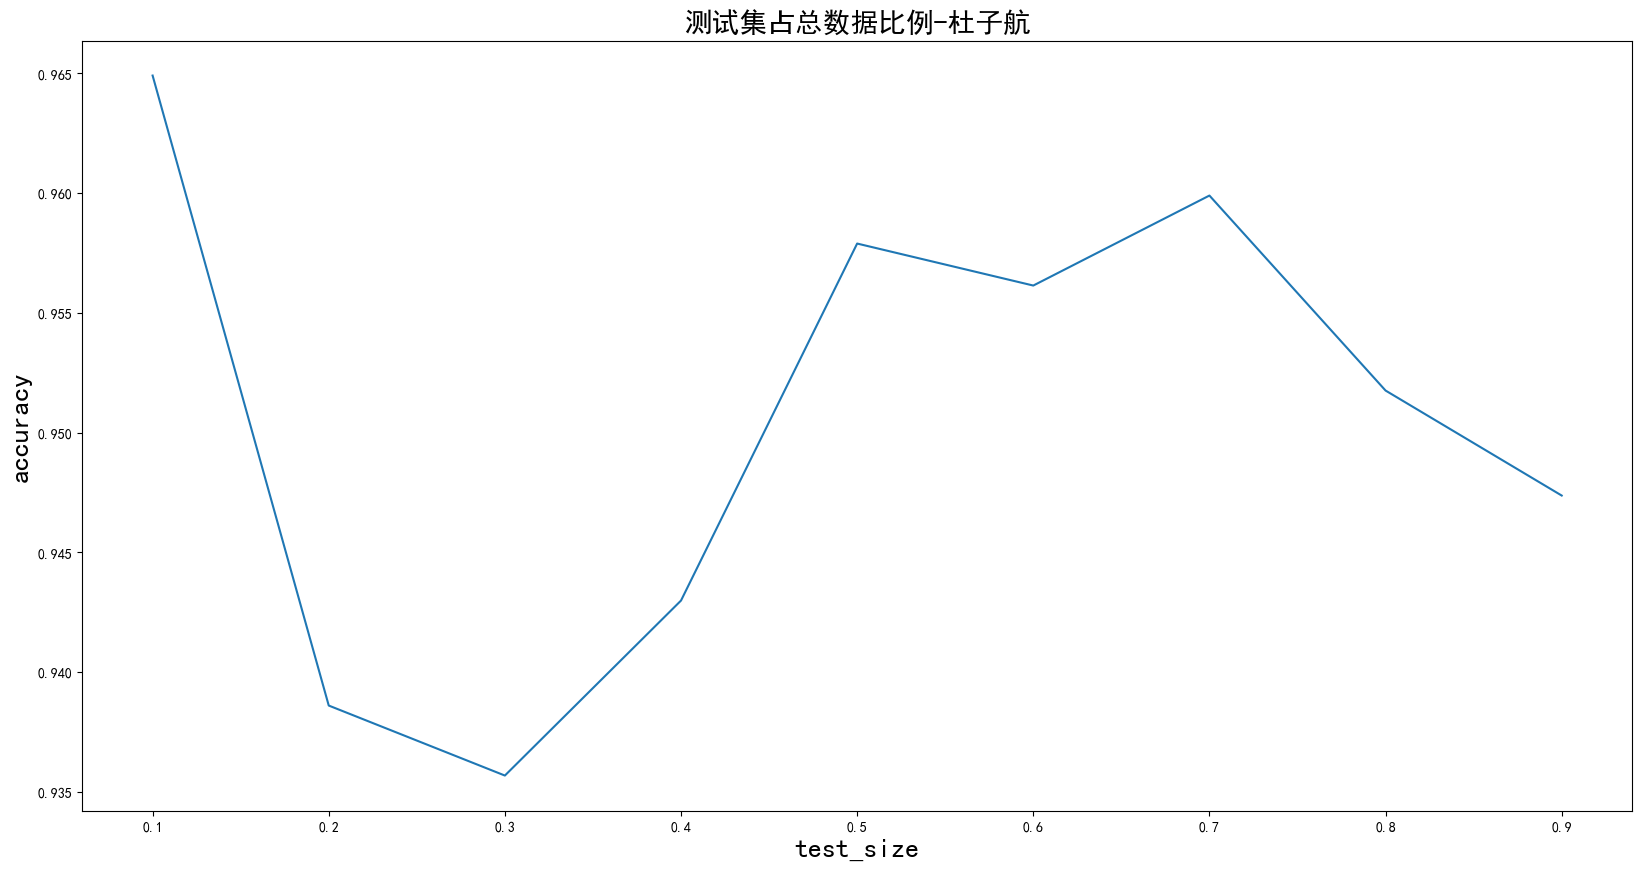

In [118]:
plt.figure(figsize=(20, 10), dpi=100)
game = ['0.1', '0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(game,accuracy)
plt.title("测试集占总数据比例-杜子航",fontsize=20)
plt.xlabel("test_size",fontsize=20)
plt.ylabel("accuracy",fontsize=20)
plt.savefig("D:/test2.jpg")
plt.show()

In [119]:
print(accuracy)

[0.9649122807017544, 0.9385964912280702, 0.935672514619883, 0.9429824561403509, 0.9578947368421052, 0.956140350877193, 0.9598997493734336, 0.9517543859649122, 0.9473684210526315]


In [120]:
print(f"Accuracy of the Logistic Regression model: {accuracy[6]}")

Accuracy of the Logistic Regression model: 0.9598997493734336


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, stratify= y, random_state=44)

In [122]:
y_pred=model.predict(X_test)

1. 使用`confusion_matrix`函数生成混淆矩阵。`y_test`和`y_pred`是预测和实际标签。混淆矩阵是一种用于评估分类模型性能的工具，它显示了模型对不同类别的预测精度。
2. 使用`classification_report`函数生成分类报告，该报告提供了模型性能的详细信息，包括每个类别的精度、召回率、F1分数等。
3. 使用seaborn库的`heatmap`函数可视化混淆矩阵。`annot=True`表示在热图中显示标签，`cmap='viridis'`设置了颜色映射，`fmt='d'`设置了数据标签的格式，`cbar=False`表示不显示颜色条，`linewidths=1`设置了线条宽度，`linecolor='black'`设置了线条颜色。


Text(0.5, 1.0, '可视化混淆矩阵——杜子航')

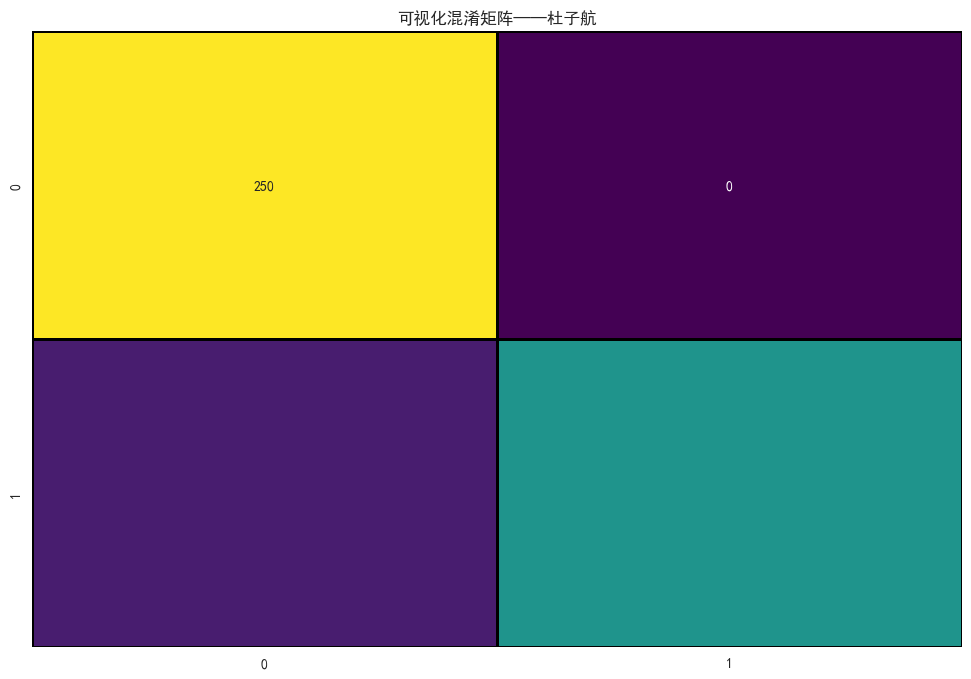

In [124]:
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
sns.set_style('whitegrid', {'font.sans-serif': ['simhei','FangSong']})
ax=sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', cbar=False, linewidths=1,linecolor='black')
ax.set_title("可视化混淆矩阵——杜子航")

In [125]:
print(f"\nClassification Report: \n\n{classification_rep}\n")


Classification Report: 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       250
           1       1.00      0.87      0.93       149

    accuracy                           0.95       399
   macro avg       0.96      0.93      0.94       399
weighted avg       0.95      0.95      0.95       399




In [126]:
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"\nPrecision: {precision_score(y_test, y_pred)}\n")
print(f"\nRecall: {recall_score(y_test, y_pred)}\n")
print(f"\nF1-Score: {f1_score(y_test, y_pred)}\n")


Accuracy: 0.949874686716792


Precision: 1.0


Recall: 0.8657718120805369


F1-Score: 0.9280575539568345



In [127]:
from sklearn.feature_selection import SelectKBest, chi2

获取特征数量

In [128]:
num_features = X.shape[1]
print("Total number of features are: ", num_features)

Total number of features are:  30


1. k_features = 10：将要选择的特征数量设置为10
2
2 `selector = SelectKBest(score_func=chi2, k=k_feature)`：创建了一个SelectKBest对象，并指定了评分函数(score_func)为chi2，计划选择的特征数量为k_features。chi2是卡方检验的评分函数，可以用于处理分类标签（离散型变量）与多个特征（离散型或连续型变量）之间的关。

3. `X_new = selector.fit(X y)`：使用选择器对特征矩阵 X 和目标变量 y 进行拟合。这将计算每个特征与目标变量之间的相关性得分，并且选择最相关的 k_features 分和p值。


In [129]:
k_features = 10
selector = SelectKBest(score_func=chi2, k=k_features)
X_new = selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Selected features: \n")
for feature in selected_features:
    print(feature)

Selected features: 

radius_mean
perimeter_mean
area_mean
concavity_mean
concave points_mean
radius_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst


In [130]:
X_Chi2 = normlaized_df[selected_features]
X_Chi2

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,0.521037,0.545989,0.363733,0.703140,0.731113,0.620776,0.668310,0.450698,0.568610,0.912027
1,0.643144,0.615783,0.501591,0.203608,0.348757,0.606901,0.539818,0.435214,0.192971,0.639175
2,0.601496,0.595743,0.449417,0.462512,0.635686,0.556386,0.508442,0.374508,0.359744,0.835052
3,0.210090,0.233501,0.102906,0.565604,0.522863,0.248310,0.241347,0.094008,0.548642,0.884880
4,0.629893,0.630986,0.489290,0.463918,0.518390,0.519744,0.506948,0.341575,0.319489,0.558419
...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.678668,0.566490,0.571462,0.690358,0.623266,0.576174,0.452664,0.328035,0.761512
565,0.622320,0.604036,0.474019,0.337395,0.486630,0.560655,0.520892,0.379915,0.256789,0.559450
566,0.455251,0.445788,0.303118,0.216753,0.263519,0.393099,0.379949,0.230731,0.271805,0.487285
567,0.644564,0.665538,0.475716,0.823336,0.755467,0.633582,0.668310,0.402035,0.749760,0.910653


In [131]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [132]:
X_train , X_test , y_train , y_test = train_test_split(X_Chi2 , y , test_size=0.7 , random_state=44)

In [133]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Text(0.5, 1.0, '可视化混淆矩阵——杜子航')

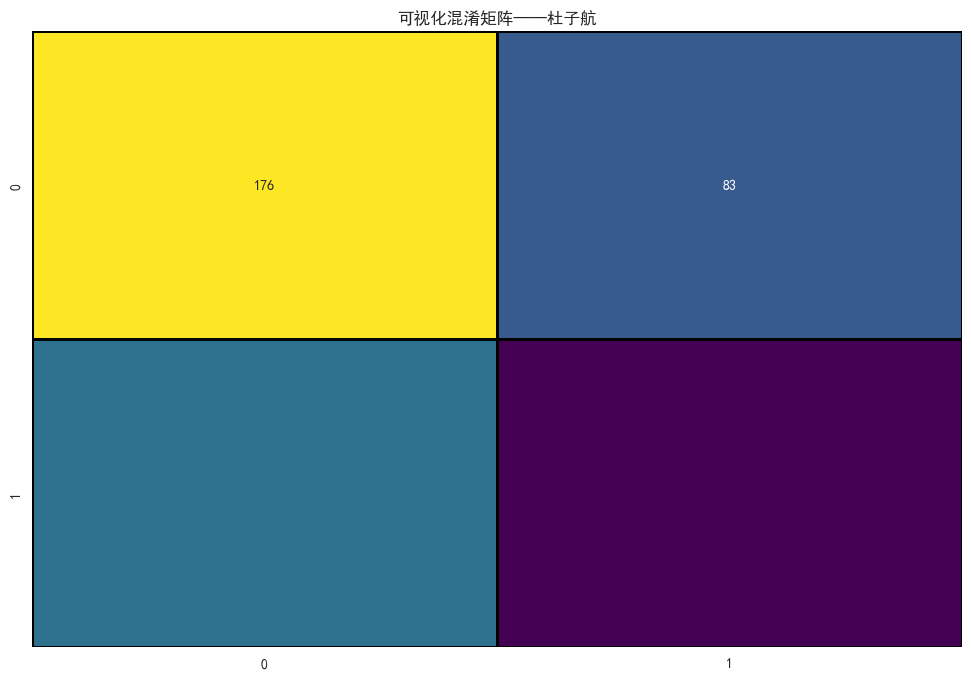

In [134]:
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
sns.set_style('whitegrid', {'font.sans-serif': ['simhei','FangSong']})
ax=sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', cbar=False, linewidths=1,linecolor='black')
ax.set_title("可视化混淆矩阵——杜子航")

In [135]:
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"\nPrecision: {precision_score(y_test, y_pred)}\n")
print(f"\nRecall: {recall_score(y_test, y_pred)}\n")
print(f"\nF1-Score: {f1_score(y_test, y_pred)}\n")


Accuracy: 0.556390977443609


Precision: 0.35658914728682173


Recall: 0.32857142857142857


F1-Score: 0.3420074349442379



In [136]:
from sklearn.feature_selection import RFE
total_num_features = X.shape[1]
print("Total number of features are: ", total_num_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=44)
model = LogisticRegression()
best_accuracy = 0
best_num_features = 0
best_selected_features = []
num_features_list = []
accuracy_list = []

Total number of features are:  30


* `for num_features in range(1, len(X.columns) + 1):`：这是一个循环，遍历从1到X的特征列数的所有可能的特征子集数量。
* `rfe = RFE(estimator=model, n_features_to_select=num_features)`：创建一个RFE对象，使用给定的模型作为估计器，并指定要选择的特征数量为当前循环中的`num_features`。
* `rfe.fit(X_train, y_train)`：使用训练数据（`X_train`和`y_train`）对RFE对象进行拟合。
* `selected_features = X.columns[rfe.support_]`：根据RFE的输出，选择被选中的特征列。
* `model.fit(X_train[selected_features], y_train)`：使用选定的特征训练模型。
* `y_pred = model.predict(X_test[selected_features])`：使用训练好的模型对测试数据（`X_test`）进行预测。
* `accuracy = accuracy_score(y_test, y_pred)`：计算预测结果的准确性。
* `if accuracy > best_accuracy:`：如果当前预测的准确性高于之前的最佳准确性，则更新最佳准确性值和特征子集。
* `num_features_list.append(num_features)`：将当前的特征子集数量添加到列表中，以便稍后使用。
* `accuracy_list.append(accuracy)`：将当前的准确性值添加到列表中，或找到最佳的特征子集。


In [138]:
for num_features in range(1, len(X.columns) + 1):
    
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)
    selected_features = X.columns[rfe.support_]
    
    model.fit(X_train[selected_features], y_train)
    
    y_pred = model.predict(X_test[selected_features])
    
    accuracy = accuracy_score(y_test, y_pred)



    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_features = num_features
        best_selected_features = selected_features
    
    
    num_features_list.append(num_features)
    accuracy_list.append(accuracy)

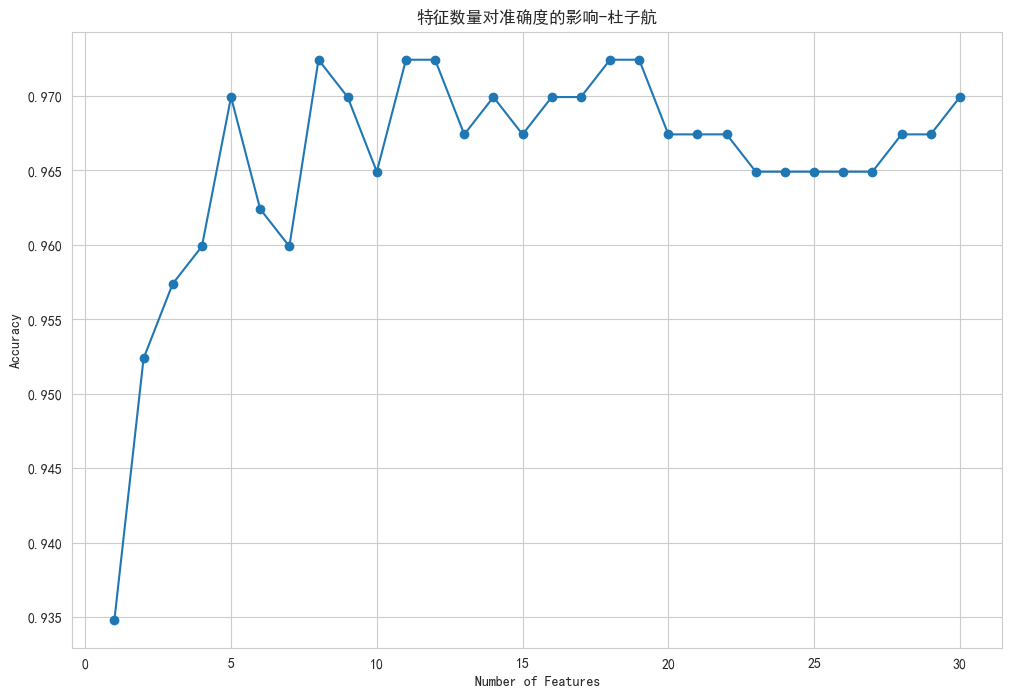

In [139]:
num_features_arr = np.array(num_features_list)
accuracy_arr = np.array(accuracy_list)
plt.plot(num_features_arr, accuracy_arr, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('特征数量对准确度的影响-杜子航')
plt.savefig("D:/test3.jpg")
plt.grid(True)
plt.show()

In [140]:
print("Best Number of Features:", best_num_features)
print("\nBest Accuracy:", best_accuracy)

print("\nBest Selected Features:")
for feature in best_selected_features:
    print(feature)

Best Number of Features: 8

Best Accuracy: 0.9724310776942355

Best Selected Features:
texture_mean
perimeter_mean
concavity_mean
concave points_mean
radius_worst
texture_worst
perimeter_worst
concave points_worst


## written by 潘兴杰2022217338

In [142]:
import pandas as pd
import numpy as np
import os
bc_data = pd.read_csv("C:\\Users\\zhanghanhan\\Desktop\\data.csv", header = 0)
bc_data = bc_data.dropna(axis = 1)
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [143]:
bc_data.shape

(569, 32)

In [144]:
print(bc_data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [145]:
bc_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [146]:
data = bc_data.drop(['id'], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [147]:
X_data = data.drop(['diagnosis'], axis = 1)
y_data = np.ravel(data[['diagnosis']].map(lambda x: 0 if x=='M' else 1))


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 1, test_size = 0.25)

In [148]:
print("Training_set", X_train.shape, y_train.shape)
print("Testing_set", X_test.shape, y_test.shape)

Training_set (426, 30) (426,)
Testing_set (143, 30) (143,)


In [149]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


#SVM
svm = SVC()
svm.fit(X_train, y_train)

#SGD
sgd = SGDClassifier(loss="hinge" , penalty="l2" , max_iter=50)
sgd.fit(X_train, y_train)


#KNN
kmn = KNeighborsClassifier(algorithm= 'kd_tree')
kmn.fit(X_train, y_train)


#DecisionTree
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
dt.fit(X_train, y_train)


#RandomForest
rf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)


#ExtraTree
et = ExtraTreesClassifier(n_estimators=10,max_depth=None, min_samples_split=2, random_state=0)
et.fit(X_train, y_train)



model_names = ['SVM', 'SGD', 'KMN', 'DecisionTree', 'RandomForest', 'ExtraTrees']
models = [svm, sgd, kmn, dt, rf, et]

In [150]:
predictions = [model.predict(X_test) for model in models]

In [151]:
from sklearn.metrics import accuracy_score
acc = [accuracy_score(y_test, pred) for pred in predictions]
results = pd.DataFrame ( [ model_names, acc ])
results.T


,0,1
0,SVM,0.909091
1,SGD,0.832168
2,KMN,0.937063
3,DecisionTree,0.951049
4,RandomForest,0.958042
5,ExtraTrees,0.951049


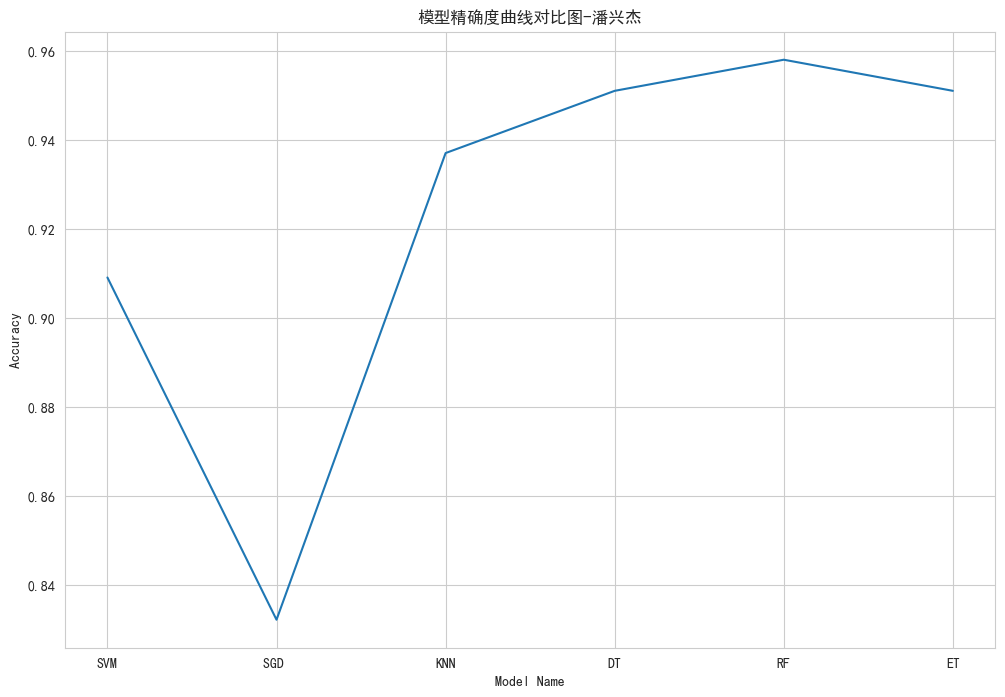

In [152]:
import matplotlib.pyplot as plt
plt.plot( [ 'SVM' , 'SGD ','KNN','DT','RF','ET' ],acc)
plt.xlabel( ' Model Name ' )
plt.ylabel( ' Accuracy ' )
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title( '模型精确度曲线对比图-潘兴杰' )
plt.show ( )


In [153]:
rf.feature_importances_

array([0.01717767, 0.01015887, 0.02446272, 0.06714908, 0.00107712,
       0.00329604, 0.08057205, 0.1450333 , 0.00354975, 0.00031374,
       0.0424748 , 0.00535281, 0.00722403, 0.12194208, 0.0067397 ,
       0.00161888, 0.0040951 , 0.00191147, 0.00161558, 0.00372973,
       0.12262488, 0.04430962, 0.10549323, 0.02807767, 0.00705379,
       0.00663459, 0.0131993 , 0.10448363, 0.00528081, 0.01334795])

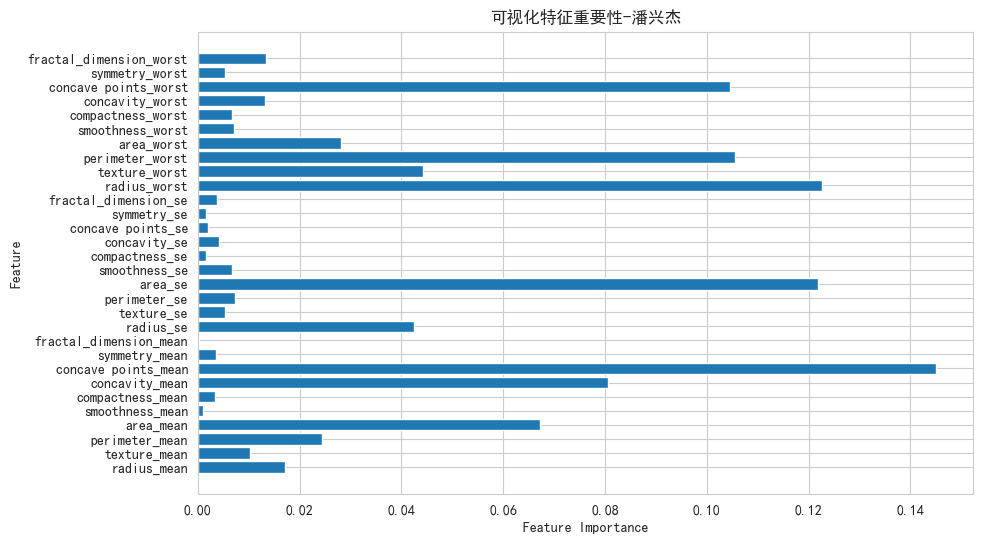

In [154]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('可视化特征重要性-潘兴杰')
plt.show()

## written by 陶俊杰2022217347

## 前言

本人在本项目中主要担任对Kaggle平台上的威斯康辛州乳腺癌数据集进行分类，并可视化，尝试了一种分类方法。主要采用线性模型f(x)= wx+b 预测乳腺癌，只有两种结果，是或否（通常用1表示是，0表示否）。该模型是一种二分类模型。
主要步骤为先进行数据集的读取和处理，然后定义乳腺癌预测模型，最后对其训练然后对测试集进行预测。模型对全部样本的预测正确率，即正确预测的患有或不患有乳腺癌的样本占总样本的比例为99.12%，这取决于学习率和迭代次数 ## 研究背景与意义 乳腺癌是女性常见的恶性肿瘤之一，对女性的健康造成了严重威胁。因此，建立准确的乳腺癌预测模型对于早期诊断和治疗至关重要。研究乳腺癌预测模型的背景与意义主要体现在以下几个方面：早期诊断：乳腺癌在早期通常没有明显的症状，因此很难被发现。建立预测模型能够通过分析患者的临床资料、影像学和生物标记物等信息，及早发现患者是否存在患癌的风险，有利于早期治疗和提高生存率。个性化治疗：乳腺癌患者由于病情的复杂性，对治疗方案的选择和预后存在巨大的差异。预测模型可以通过分析患者的基因型、表型、分子生物学等信息，为患者提供个性化的治疗方案，提高治疗效果。临床决策支持：医生在面对乳腺癌患者时，需要根据患者的情况进行个性化的治疗决策。预测模型可以为医生提供客观、科学的依据，辅助医生进行临床决策，提高治疗的水平和效果。
通过研究乳腺癌预测模型，可以为临床提供更加准确、个性化的诊断和治疗方案，促进乳腺癌的早期诊断和治疗，提高患者的生存率和生活质量。提高早期诊断率：乳腺癌预测模型可以帮助医生和患者早期发现乳腺癌的风险，使得患者可以及时进行治疗，提高治愈率和存活率。个性化治疗方案：预测模型可以根据患者的临床数据和生物标志物特征，为患者提供个性化的治疗方案，提高治疗效果。资源优化分配：预测模型可以帮助医疗机构合理分配资源，将更多的关注和资源投入到高风险的患者身上，提高医疗资源的利用效率。风险评估和预防干预：预测模型可以帮助人们了解自身乳腺癌的风险，采取相关的预防干预措施，包括生活方式改善、定期体检等，降低患病风险。通过构建乳腺癌预测模型，可以帮助提高患者的生存率和生活质量，促进医疗资源的合理利用，同时也有助于提升公众对乳腺癌的关注和认识。

## 模型方法

采用线性模型f(x)= wx+b 预测乳腺癌，只有两种结果，是或否（通常用1表示是，0表示否）。该模型是一种二分类模型。激活函数 Sigmod 可以将任意值映射到0和1之
如果预测概率值小于0.5，则表示没有患乳腺癌（f(x)<0.5，输出 0）
如果预测概率值大于等于0.5，则表示患有乳腺癌（f(x)>=0.5，则输出 1 ）间之间。

## 1数据集的读取与处理

### 1.读取文件

加载存储介质上的数据文件，较为常见的 *.csv 文件。通常采用pandas包。

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1

<Axes: title={'center': '半径平均值和质地平均值图表-陶俊杰'}>

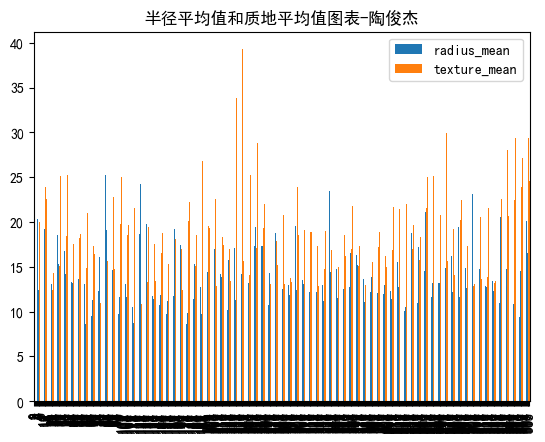

In [2]:
%matplotlib inline
import pandas as pd 
from pylab import mpl
 
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Pure memory\\机器学习\\大作业\\2022217347陶俊杰\\源代码\\data.csv", encoding="GB2312")
df_class={'B':0,'M':1}
df['diagnosis']=df['diagnosis'].map(df_class)
print(df)
df.plot.bar(y=['radius_mean', 'texture_mean'], title = "半径平均值和质地平均值图表-陶俊杰")
# df.plot.bar(y=['texture_mean'])
# df.plot.bar(y=['perimeter_mean'])
# df.plot.bar(y=['area_mean'])
# df.plot.bar(y=['smoothness_mean'])
# df.plot.bar(y=['compactness_mean'])

In [3]:
df.shape

(569, 33)

In [4]:
df.columns.shape

(33,)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=569, step=1)

从上面的结果中我们知道该数据集合中共有569条数据，每条数据有33个和乳腺癌相关的病变特征，最后一列是该患者是否患有乳腺癌的诊断结果。
其中，标记:
B表示没有患有乳腺癌
M表示患有乳腺癌

可以利用pandas中的切片,将表中的特征和标签分开

In [7]:
# 每行数据有30个乳腺病理特征, 最后一列表示是否患有乳腺癌
X = df[df.columns[0:-1]].values
Y = df[df.columns[1]].values
print(X.shape,Y.shape)

(569, 32) (569,)


## 2.数据集的划分
通常数据集分为：训练数据和测试数据两个部分，可利用sklearn中的model_selection函数，将原数据按比例随机分为训练集数据和测试集数据。

In [8]:
from sklearn.model_selection import train_test_split
# 按照0.8 和 0.2 的比例随机划分数据集合
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, 
                             test_size=0.2,random_state=1234)
print(f'X_train.shape={X_train.shape}')
print(f'Y_train.shape={Y_train.shape}')
print(f'X_test.shape={X_test.shape}')
print(f'Y_test.shape={Y_test.shape}')

X_train.shape=(455, 32)
Y_train.shape=(455,)
X_test.shape=(114, 32)
Y_test.shape=(114,)


从上述结果中可以看出，可以看到共有569条数据，其中训练数据455条、测试数据114条。

## 3.数据集的标准化
为了加快模型的收敛速度,一般都需要对原始数据进行标准化处理（将所有的数据按照比例缩放到一定范围内）。下面的例子使用sklearn.preprocessing来对数据集合进行标准化。 其中，fit_transform()的功能是对数据进行某种统一处理，将数据缩放(映射)到某个固定区间。实现数据的标准化、归一化等等。作用：保留特征，去除异常值。

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

最后, 为了使用PyTorch进一步处理，将数据封装到PyTorch的张量对象中：

In [10]:
import torch
import numpy as np

X_train = torch.from_numpy(X_train.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))

X_test = torch.from_numpy(X_test.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

# 将标记集合 Y_train 和 Y_test 转成2维
Y_train = Y_train.view(Y_train.shape[0],1)
Y_test = Y_test.view(Y_test.shape[0],1)
print(Y_train.size(),Y_test.size())

torch.Size([455, 1]) torch.Size([114, 1])


## 4.乳腺癌预测模型的定义
采用线性模型f(x)= wx+b 预测乳腺癌，只有两种结果，是或否（通常用1表示是，0表示否）。该模型是一种二分类模型。
通常会采用激活函数：Sigmoid。
激活函数 Sigmod 可以将任意值映射到0和1之间

那如何判断是否患癌？
●如果预测概率值小于0.5，则表示没有患乳腺癌（f(x)<0.5，输出 0）
●如果预测概率值大于等于0.5，则表示患有乳腺癌（f(x)>=0.5，则输出 1）。
综上，预测乳腺癌的模型类的定义如下:

In [11]:
# 自定义模型 
class MyModel(torch.nn.Module):
    def __init__(self,in_features):
        super(MyModel,self).__init__()   #调用父类的构造函数！
        # 搭建自己的神经网络
        # 1.构建线性层
        self.linear = torch.nn.Linear(in_features,1)
        # 2.构建激活函数层
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self,x):
        """重写了父类的forward函数，正向传播"""
        pred = self.linear(x)
        out = self.sigmoid(pred)
        return out

神经网络定义完成后，需进行：
1）确定代价（损失）函数、学习率
2）构建神经网络模型对象
3）构建优化器对象，并为优化器指定模型参数和学习率

In [12]:
# 损失函数公式定义
loss = torch.nn.BCELoss()

# 学习率，迭代次数
learning_rate = 0.01
num_epochs = 10000

# 获取样本量和特征数，创建模型
n_samples,n_features = X.shape
model = MyModel(n_features)

# 创建优化器，
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
 
#打印模型、打印模型参数
print(model)
print(list(model.parameters()))

MyModel(
  (linear): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
[Parameter containing:
tensor([[-0.1728, -0.0440,  0.1354, -0.1515, -0.1517,  0.1543,  0.1673, -0.1068,
         -0.1590, -0.0584,  0.0693,  0.1690,  0.0316, -0.0817, -0.1724,  0.1597,
         -0.1129, -0.0155, -0.1507, -0.1378, -0.1611, -0.0775, -0.0893,  0.0530,
         -0.1482, -0.1144,  0.0757, -0.1088, -0.0630,  0.0810,  0.1000, -0.0061]],
       requires_grad=True), Parameter containing:
tensor([0.0189], requires_grad=True)]


model中的参数集合中包括了两个子集，分别对应线性层self.linear 当中的32个w和1个b ，其shape为：

In [13]:
list(model.parameters())[0].shape

torch.Size([1, 32])

In [14]:
list(model.parameters())[1].shape

torch.Size([1])

## 5.乳腺癌预测模型的训练与预测
定义完损失函数和优化器后，模型训练步骤是固定的，如下所示：
●通过模型的正向传播，得到预测结果
●根据预测结果和真实标记值计算损失
●通过反向传播，获取模型参数的梯度
●根据梯度值，更新模型参数的权重
●进行梯度的清空
●循环上面的操作，直到预定次数，或者损失较足够小（<= 阈值）为止

In [15]:
def check_input_range(input_tensor):
    if torch.min(input_tensor) < 0 or torch.max(input_tensor) > 1:
        # 对输入数据进行处理，确保在0和1之间
        input_tensor = input_tensor.clamp(0, 1)
    return input_tensor

threshold_value = 0.00001
Y_train = check_input_range(Y_train)
for epoch in range(num_epochs):
    pred = model(X_train)  # 正向传播，调用forward()方法
    ls = loss(pred,Y_train)   # 计算损失（标量值）
    # ls =  0 * sum([x.sum() for x in model.parameters()])
    ls.backward()   # 反向传播
    optimizer.step()     # 更新权重
    optimizer.zero_grad()    # 清空梯度
    if epoch%500 == 0:
        print(f"epoch:{epoch},loss={ls.item():.4f}")
    if ls.item() <= threshold_value:
        break;
print("模型训练完成! loss={0}".format(ls))

epoch:0,loss=0.9899
epoch:500,loss=0.0790
epoch:1000,loss=0.0498
epoch:1500,loss=0.0374
epoch:2000,loss=0.0303
epoch:2500,loss=0.0257
epoch:3000,loss=0.0223
epoch:3500,loss=0.0197
epoch:4000,loss=0.0177
epoch:4500,loss=0.0161
epoch:5000,loss=0.0148
epoch:5500,loss=0.0136
epoch:6000,loss=0.0127
epoch:6500,loss=0.0118
epoch:7000,loss=0.0111
epoch:7500,loss=0.0105
epoch:8000,loss=0.0099
epoch:8500,loss=0.0094
epoch:9000,loss=0.0089
epoch:9500,loss=0.0085
模型训练完成! loss=0.008103854022920132


使用区别于训练数据的另外数据集测试集,计算模型预测的准确率。代码如下：

In [ ]:
with torch.no_grad():       # 无需向后传播（非训练过程）
    y_pred = model(X_test)
    # 上面计算出来的结果是0-1之间的数,将数据进行四舍五入,得到0或1
    y_pred_cls = np.round(y_pred)
    # print(y_pred)
    # 统计结果
    acc = torch.eq(Y_test, y_pred_cls).sum().numpy() / float(Y_test.shape[0])
    # print(torch.eq(Y_test, y_pred_cls).sum().numpy())
    print(f"准确率:{acc.item() * 100 :.2f}"+'%')

利用测试数据，计算出整个模型的预测准确率超过 90%，证明我们的模型可以很好的进行乳腺癌的诊断预测。